Interior point method for linear programming
======
<h3>Geometry of linear programming</h3>

Linear programming is one of the major class of mathematical optimization problems and is probably the most exploited one. A general form of linear programming problem is as follows (inequalities are component-wise)
$$
\begin{array}{rl}
\mbox{minimize} & c^Tx \\
\mbox{subject to} & Ax\leq b \\
& Px=d
\end{array}
$$
Although it is possible to express a problem with just inequality constrains, they are usually considered explicity. First of all, lets start from some basic geometric properties of the problem.

Consider a vector $a=(a_1, \ldots, a_n)$ and a scalar $c$. A single equation of the form (first equality is just for clarity)
$$
a^Tx=\sum_{i=1}^na_ix_i=c
$$
defines a hyperplane with $n-1$ degree of freedom in $\mathbb{R}^n$ and divides the space into two half-spaces one with $a^Tx<c$ and the other with $a^Tx>c$.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
plt.rcParams["figure.figsize"] = [12,12]
#If you have problems with latex at matplotlib just comment next two lines, this might help
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

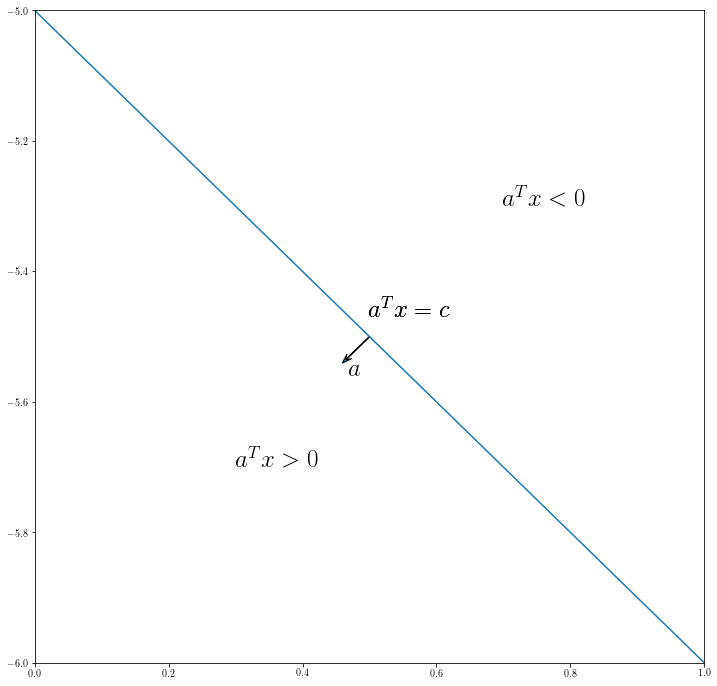

In [3]:
a = [-1, -1]
c = 5
x = [0, 1]
y = [(c - a[0] * _x) / a[1] for _x in x]
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.autoscale(False)
plt.plot(x, y)
plt.arrow(sum(x) / 2, sum(y) / 2, a[0] * 0.03, a[1] * 0.03, head_width=0.01, overhang=0.5)
plt.text(sum(x) / 2 + a[0] * 0.03,  sum(y) / 2 + a[1] * 0.03-0.03, '$a$', fontsize=25)
plt.text(sum(x) / 2, sum(y) / 2 + 0.03, '$a^Tx=c$', fontsize=25)
plt.text(sum(x) / 2, sum(y) / 2 + 0.03, '$a^Tx=c$', fontsize=25)
plt.text(sum(x) / 2 + a[0] * 0.2,  sum(y) / 2 + a[1] * 0.2, '$a^Tx>0$', fontsize=25)
plt.text(sum(x) / 2 - a[0] * 0.2,  sum(y) / 2 - a[1] * 0.2, '$a^Tx<0$', fontsize=25)
plt.show()

Whenever we combine two equations $a_1^Tx=c_1$ and $a_2^Tx=c_2$ that are linear independet we get a $n-2$ dimension hyperplane. There might be two situations when $a_1, a_2$ are linearly depended: either they are equivalent and thus we get a $n-1$ dimension hyperplane or they are contradictory, corresponding hyperplanes become parallel and thus the  system has no solution. 

In general case, when $A$ has $m$ rows (that is $m$ equations), if rows of $A$ are linearly independent then the system defines $n-m$ dimention hyperlane. If rows of $A$ are linear dependent then their are either contradictory and thus define an empty space or some of the equations can be dropped without chaning the solution set, in particular $m-\mbox{rank}~A$ equations can be dropped resulting in $n-\mbox{rank}~A$ dimention hyperplane. 

Next, a single inequality defines a half-space, when we combine several inequalities we get an intersection of half-spaces which is some convex polytope, possibly infinite. Moreover, any convex polytope can be expressed in terms of inequality constrains. For the rest of this manual we will work with the following 2D polygon, for simplicity it is given as the set of verticies and then converted to a set of inequalities

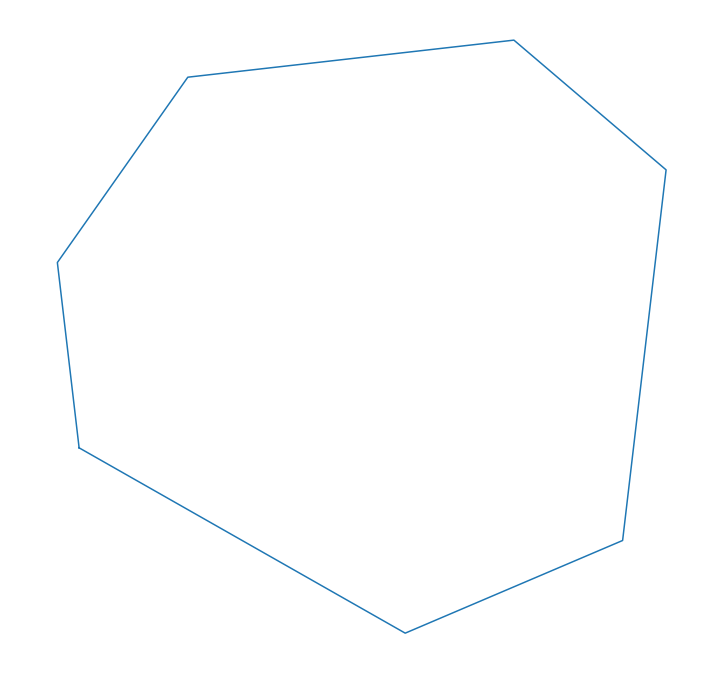

In [4]:
coords = [(2.0, 2.0), (1.9, 3.0), (2.5, 4.0), (4.0, 4.2), (4.7, 3.5), (4.5, 1.5), (3.5, 1.0), (2.0, 2.0)]
def draw_path(path, mark_points = None, enum_points = False):
    _x = [x for x, y in path]
    _y = [y for x, y in path]
    plt.plot(_x, _y,)
    if mark_points:
        for point in path:
            plt.plot(point[0], point[1], 'o', color=mark_points)
    if enum_points:
        cur = 1
        for point in path:
            plt.text(point[0], point[1], f'{cur}', fontsize=25)
            cur += 1          
    
draw_path(coords)    
plt.axis('off')
plt.show()

In [5]:
# from two points defines the coefficients a, b, c such that a line ax+by=c goes through these points 
def get_line(x1, x2):
    a = x1[1] - x2[1]
    b = x2[0] - x1[0]
    c = a * x1[0] + b * x1[1]
    return a, b, c

In [6]:
# Creating constrains in a form of inequalities
A_leq = []
b_leq = []

for i in range(len(coords) - 1):
    a, b, c = get_line(coords[i], coords[i + 1])
    A_leq.append([a, b])
    b_leq.append(c)
    print(f'{float(a):6.2} * x + {float(b):4.2} * y <= {float(a):4.2}')

  -1.0 * x + -0.1 * y <= -1.0
  -1.0 * x +  0.6 * y <= -1.0
  -0.2 * x +  1.5 * y <= -0.2
   0.7 * x +  0.7 * y <=  0.7
   2.0 * x + -0.2 * y <=  2.0
   0.5 * x + -1.0 * y <=  0.5
  -1.0 * x + -1.5 * y <= -1.0


<h3>An optimization problem of linear programming</h3>
So, the problem of linear programming is minimizing or maximizing a linear function $c^Tx$ (here $c$ is a vector) over a set of equality and inequality constrains. This can be viewed as finding the farthest point (for maximization) in the direction of $c$ of the polytope corresponding to the inequalities. For minimizing we want to find the farthest point in the opposite direction

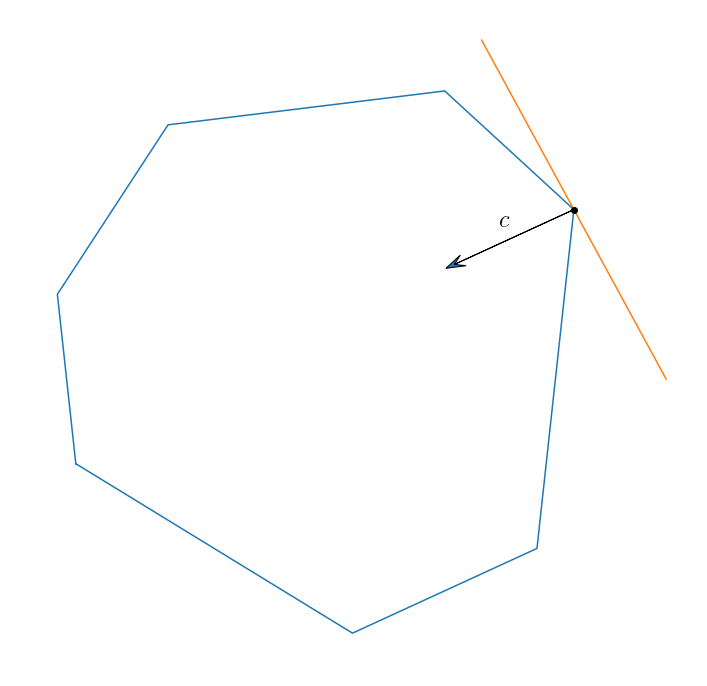

In [7]:
import numpy as np
direction = np.array([-2, -1]) # c
orth_vector = [direction[1], -direction[0]] # vector orthogonal to c, for plotting
solution = coords[4]
draw_path(coords)
plt.plot([solution[0] - 0.5 * orth_vector[0], solution[0] + 0.5 * orth_vector[0]], 
         [solution[1] - 0.5 * orth_vector[1], solution[1] + 0.5 * orth_vector[1]])
plt.plot(solution[0], solution[1], 'o', color='black')
plt.arrow(solution[0], solution[1], direction[0] * 0.3, direction[1] * 0.3, head_width=0.07, overhang=0.5)
plt.text(solution[0] + direction[0] * 0.2, solution[1] + direction[1] * 0.2 + 0.1, '$c$', fontsize=25)
plt.axis('off')
plt.show()

<h1>Simplex method</h1>
Simplex method was probably the first successful method for solving linear programming problems introduced by Dantzig. The idea behind it is quite simple and consists of two plots:
* A point $x^*$ is a <i>vertex</i> of a convex polytope in $\mathbb{R}^n$ induced by a set of inequalities $Ax\leq b$ iff it turns some linearly independent subset of $n$ of these inequalities into equalities. The crucial property of the vertex is that they are the only points for those there is no direction such that you will stay inside the polytope by moving both forward and backward along that direction. A simple corollary is that if linear programming problem has a solution (that is feasible and bounded below) there is always a vertex solution. For any subset of linear independent inequalites there is only one vertex candidate as there is a uniqe solution to linear system with square full rank matrix, thus the number of verticies is finite and is bounded by $\left(\begin{array}{cc}m \\ n\end{array}\right)$. One simple algorithm might be simply to check all the $\left(\begin{array}{cc}m \\ n\end{array}\right)$ vertex candidates. Simplex method checks them in a smart way.
* An <i>edge</i> of the polytope is the line segment that turns exactly $n-1$ linearly independent inequalities into equalities, edges our bounded by two vertices. These vertices and edges form a graph in a traditional way. Now the important part: vertex is the optimal solution of linear programming problem if no adjacent vertex has a better value of optimization function and vice versa, this is a strict corollary of convexity. A simplex method is a straightforward exploitation of this propery: start from some vertex and move to a better adjacent one iteratively untill you reach the one that has no better adjacent candidate.

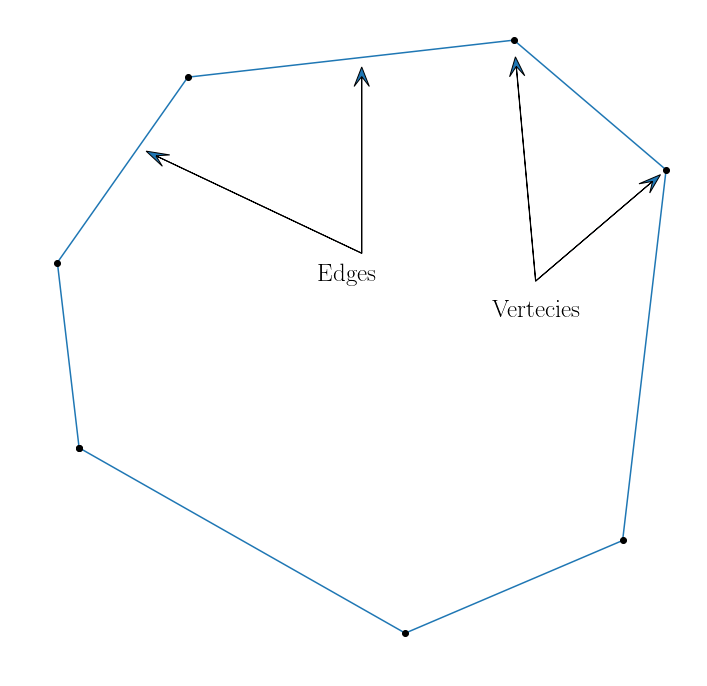

In [8]:
draw_path(coords)
plt.arrow(solution[0] - 0.6, solution[1] - 0.6, 0.5, 0.5, head_width=0.07, overhang=0.5)
plt.arrow(solution[0] - 0.6, solution[1] - 0.6, 
          0.85 * (coords[3][0] - solution[0] + 0.6), 0.85 * (coords[3][1] - solution[1] + 0.6), 
          head_width=0.07, overhang=0.5)
plt.text(solution[0] - 0.8, solution[1] - 0.8, 'Vertecies', fontsize=25)
edge_text_point = (solution[0] - 1.6, solution[1] - 0.6)
plt.text(edge_text_point[0], edge_text_point[1], 'Edges', fontsize=25)
plt.arrow(edge_text_point[0] + 0.2, edge_text_point[1] + 0.15, 
          0, 0.9, head_width=0.07, overhang=0.5)
plt.arrow(edge_text_point[0] + 0.2, edge_text_point[1] + 0.15, 
          -0.9, 0.5, head_width=0.07, overhang=0.5)
for point in coords:
    plt.plot(point[0], point[1], 'o', color='black')
plt.axis('off')
plt.show()

I will not cover the principles of encoding this idea in a numerical form <strike>because i fail to understand it completely</strike> luckily for demonstration purposes scipy optimization package contains a simplex method implementation with per step information available.

In [9]:
#Simplex setup
import scipy
import scipy.optimize
simplex_steps = []
scipy.optimize.linprog(direction, A_ub=np.array(A_leq), b_ub=np.array(b_leq), 
                       callback=lambda xk, **kwargs: simplex_steps.append([xk.copy(), kwargs.copy()]))

     fun: -12.900000000000002
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([2.85, 2.5 , 0.  , 0.  , 0.  , 1.9 , 4.95])
  status: 0
 success: True
       x: array([4.7, 3.5])

Simplex method requires a feasible vertex as a starting point, finding one is usually done by solving the following auxiliary problem
$$
\begin{array}{rl}
\mbox{minimize} & s \\
\mbox{subject to} & A_ix \leq b_i + s \\
& Px=d
\end{array}
$$
Here $s$ is a scalar. If an optimal value of this problem is non-positive then the corresponding value of $x$ is feasible for initial problem otherwise initial problem is infeasible, that is the corresponding constraints define an empty set. In scipy a simplex method is divided in two phases: first phase solves auxiliary problem and second solves the initial one.

[0. 0.] 1
[0.1 0. ] 1
[1.5        2.33333333] 1
[2. 2.] 1
[2. 2.] 2
[3.5 1. ] 2
[4.5 1.5] 2
[4.7 3.5] 2


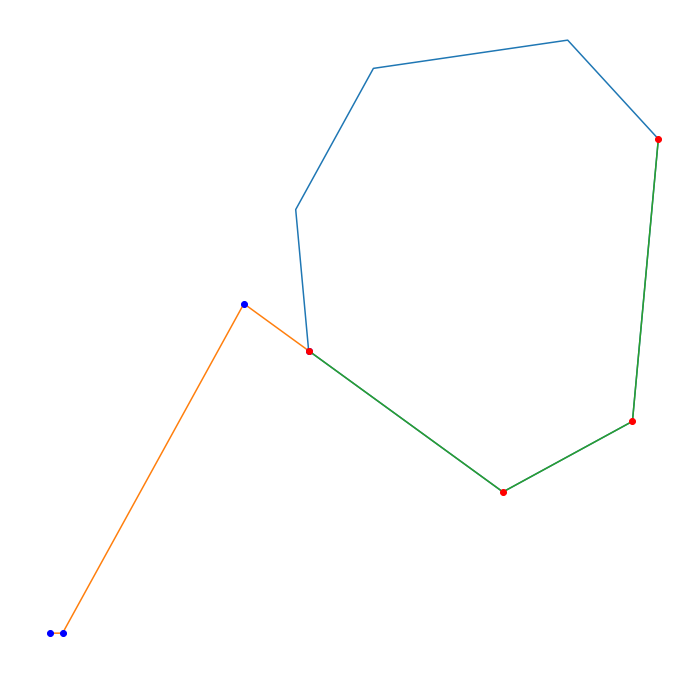

In [10]:
for x, info in simplex_steps:
    print(x, info['phase'])
x_simplex_1 = [x for x, info in simplex_steps if info['phase'] == 1]
x_simplex_2 = [x for x, info in simplex_steps if info['phase'] == 2]
draw_path(coords)
draw_path(x_simplex_1, mark_points='blue')
draw_path(x_simplex_2, mark_points='red')
plt.axis('off')
plt.show()

# Interior point method
Interior point method was introduced by von Neumann and is roughly as old as simplex method. At that time unfortunately this method wasn't good in practice but became popular in middle 1980s. The first successful interior point method was introduced by Karmarkar in 1984. It was proven to be polynomial and competed well with the simplex method in practice. Here i'll give you a modern view on interior point method. 
### Barier functions
Interior point method follows a simple paradigm: decode constrains inside the optimization function. This can be done in a different ways but any of these ways makes optimization function more complex. Probably the simpliest way is to use so called <i>indicator function</i>
$$
I_\mathcal{K}(x)=\begin{cases}
+\infty, & x\notin\mathcal{K} \\
0 & x\in \mathcal{K}
\end{cases}
$$
Minimizing $f$ on $\mathcal{K}$ is equivalent to optimizing $f+I_\mathcal{K}$ on $\mathbb{R}^n$ (or any other global domain). Unconstraned problems are typically easier, but indicator function is quite irregular and is hard to deal with. Usually continuous and smooth functions are preferred. For this reasons comes the idea of approximating indicator functions. And here is where barrier function comes in. The function $B_\mathcal{K}:\mathcal{K}\rightarrow \mathbb{R}$ is a <i>barrier function</i> of $\mathcal{K}$ is it has the following properties:
* $B_\mathcal{K}(x) < +\infty$ for interior of $\mathcal{K}$
* $B_\mathcal{K}(x) = +\infty$ for border of $\mathcal{K}$
* $B_\mathcal{K}(x_k)\rightarrow +\infty$ as $x_k$ converges to border of $\mathcal{K}$
Here i will not cover what exactly are interior and border in a general case, what you need to know is that for half-space $a^Tx\leq c$ the interior is $a^Tx<c$ and the border is $a^Tx=c$.

A simple property of barriers is that if $B_\mathcal{K}+B_\mathcal{L}$ is a barrier for $\mathcal{K}\cap\mathcal{L}$. Now, one way of defining the barrier that is actually used for interior point method is the <i>logarithmic barrier</i>: if $\mathcal{K}$ is defined as $g(x)\leq 0$ then function
$$
B(x)=-C\log(-g(x))
$$
is a barrier for $\mathcal{K}$. Note that the closer $C$ goes to $0$ the more it resembles indicator function

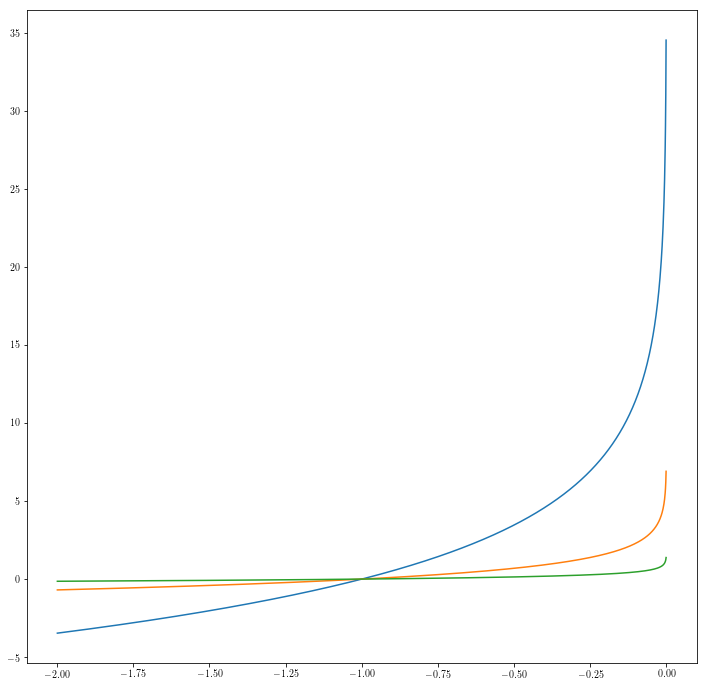

In [11]:
arr = np.arange(-1.999, -0.001, 0.001)
for t in [5, 1, 0.2]:
    plt.plot(arr, [-t * np.log(-x) for x in arr])
plt.show()

### Central path
Suppose we want to solve the following problem
$$
\begin{array}{rl}
\mbox{minimize} & f(x) \\
\mbox{subject to} & g_i(x)\leq 0,~1\leq i\leq m. \\
\end{array}
$$
Suppose we have a set of barrier functions corresponding to each $m$ of these inequalities, in particular $B_i$ is the barrier function for $g_i(x)\leq 0$. Consider the following parametric family of functions
$$
F(t, x)=tf(x)+\sum_{i=1}^m B_i(x).
$$
Let $x^*(t)$ be the minimum of $F(t, x)$ on $x$. Due to the properties of barrier functions, $x^*(t)$ satisfies all of the constrains strictly if $f$ is bounded above. Thus, $x^*(t)$ is an interior point of these constrains. The greater is $t$ the more $f$ contributes to the minimum and hopefully it converges to solution of the considered problem. It happens that $x^*(t)$ defines a curve that is usullay referred to as <i>central path</i> and in fact it does converge to the solution in many cases including linear programming. The starting point of the central path is so called <i>analytic center</i> -- the point of minimum of barrier sum $\sum_{i=1}^m B_i(x)$.

Now lets look at central path and analytic center for our linear programming problem, for demonstration purposes i will use CVXPY as it is capable of handling general nonlinear convex optimization problems.  

In [12]:
import cvxpy
v = cvxpy.Variable(2)

In [13]:
#logarithmic barrier
def log_bar(A, b, v):
    s = 0
    for i in range(len(b)):
        s += -cvxpy.log(b[i] - A[i] * v )
    return s
# Analytic center
A_ = np.array(A_leq)
s = log_bar(A_, b_leq, v)
obj = cvxpy.Minimize(s)
constr = A_ * v <= b_leq
prob = cvxpy.Problem(obj, [constr])
prob.solve()
a_center = v.value
#Central path
central_path = []
t = 100
alpha = 0.5
for i in range(100):
    s = log_bar(A_, b_leq, v)
    s = s * t + direction * v
    t *= alpha
    obj = cvxpy.Minimize(s)
    constr = A_ * v <= b_leq
    prob = cvxpy.Problem(obj, [constr])
    prob.solve()
    central_path.append(v.value)

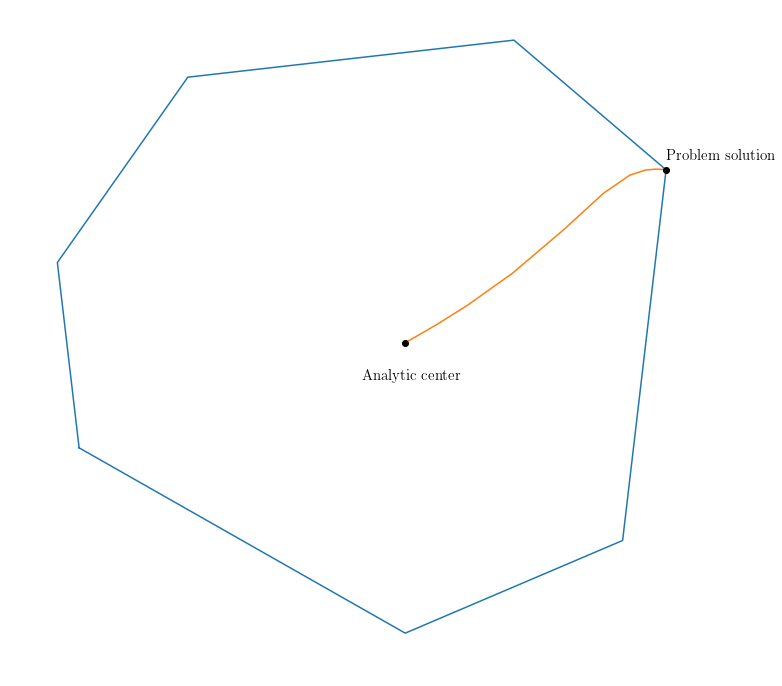

In [14]:
x = [x_ for x_, y_ in coords]
y = [y_ for x_, y_ in coords]
plt.plot(x, y)
x_s = [x_ for x_, y_ in central_path]
y_s = [y_ for x_, y_ in central_path]
plt.text(a_center[0] - 0.2, a_center[1] - 0.2, 'Analytic center', fontsize=15)
plt.text(central_path[-1][0], central_path[-1][1] + 0.05, 'Problem solution', fontsize=15)
plt.plot(x_s, y_s)
plt.plot(a_center[0], a_center[1], 'o', color='black')
plt.plot(central_path[-1][0], central_path[-1][1], 'o', color='black')
plt.axis('off')
plt.show()

A simple approch for approximation is just to choose big enough $t$ and minimize $F(t, x)$. The problem is, we need a proper method to solve such a problem. Even though we can easily get a continuous and smooth function for a barrier, it's structure still might be hard to handle. But here comes probably the last part of the interior point method: a Newton method. For optimization problem it works as follows. Consider a quadratic approximation for $f$ using Taylor series:
$$
f(x+y)=f(x)+\nabla f(x)^Ty+\frac{1}{2}y^T\nabla^2 f(x)y
$$
Newton method starts at some point $x_0$ and iteratively improves it by minimizing corresponding quadratic approximation. In particular, the minimum of the above expression on $y$ is the solution of linear system $\nabla^2 f(x)y=-\nabla f(x)$. This systems is sometimes referred to as Newton system and corresponding solution $y$ as Newton step. Newton method is thus constructing the following sequence
$$
x_{k+1}=x_k-[\nabla^2f(x_k)]^{-1}\nabla f(x)
$$

The thing is, it happens that Newton method is quite good for these kind of problems. The crucial property is that if we use a logarithmic barrier then Newton step is guarantied to produce a proper sequence that lies inside the corresponding polytope. For interior point method a slightly better sequence is used. Rather then sticking with constant $t$ we enlarge it as Newton method progresses. That is, we alterate between Newton steps and $t$ increment steps.

Now before we can implement this, one final remark about gradient and hessian of logarithmic barrier. Let
$$
F(t, x)=tc^Tx-\sum_{i=1}^m\log(b_i-A_ix)
$$
then its gradient with respect to $x$ can be calculated straightforward as 
$$
\nabla F(t, x)=tc+\sum_{i=1}^m\frac{1}{b_i-A_ix}A_i=A^Td
$$
and hessian as
$$
\nabla^2 F(t, x)=\sum_{i=1}^m\frac{1}{(b_i-A_i)^2}A_i^TA_i=A^T diag(d)^2A
$$
where
$$
d=\left(\frac{1}{b_1-A_1x}, \ldots, \frac{1}{b_m-A_mx}\right)^T
$$

In [15]:
# A, b, v -- arrays/ndarrays
def log_bar_grad(A, b, v):
    s = 0
    for i in range(len(b)):
        s += 1.0 / (b[i] - np.dot(A[i], v)) * A[i].T
    return s

def log_bar_hess(A, b, v):
    s = 0
    d = np.diag(np.array([1.0 / (b[i] - A[i] @ v) ** 2 for i in range(len(b))]))
    return A.T @ d @ A

Note that just as well as for simplex method, we need a feasible starting point. We can use the same trick with auxiliary problem, but for simplicity i'll just use a predefined starting point.

In [16]:
x_start = [3, 3]
following_path = [x_start.copy()]
t = 10
alpha = 0.5
for i in range(10):
    grad = log_bar_grad(A_, b_leq, x_start)
    hess = log_bar_hess(A_, b_leq, x_start)
    #Solve the Newton system
    dx = np.linalg.solve(t * hess, t * grad + direction)
    #Newton step
    x_start -= dx
    following_path.append(x_start.copy())
    #t increment step
    t *= alpha

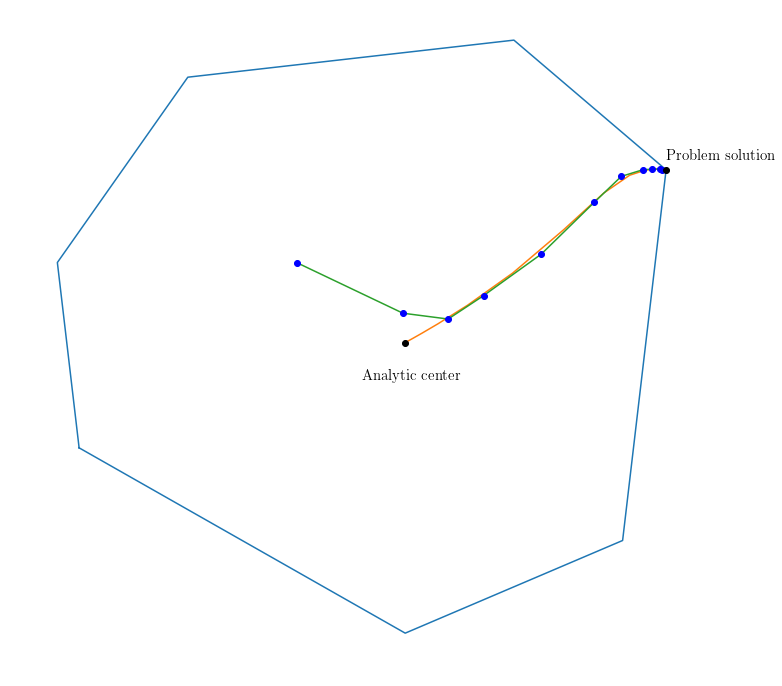

In [17]:
x = [x_ for x_, y_ in coords]
y = [y_ for x_, y_ in coords]
plt.plot(x, y)
x_s = [x_ for x_, y_ in central_path]
y_s = [y_ for x_, y_ in central_path]
x_f = [x_ for x_, y_ in following_path]
y_f = [y_ for x_, y_ in following_path]
plt.text(a_center[0] - 0.2, a_center[1] - 0.2, 'Analytic center', fontsize=15)
plt.text(central_path[-1][0], central_path[-1][1] + 0.05, 'Problem solution', fontsize=15)
plt.plot(x_s, y_s)
plt.plot(x_f, y_f)
for i in range(len(x_f)):
    plt.plot(x_f[i], y_f[i], 'o', color='blue')
plt.plot(a_center[0], a_center[1], 'o', color='black')
plt.plot(central_path[-1][0], central_path[-1][1], 'o', color='black')
plt.axis('off')
plt.show()

### Handling equality constrains
For interior point method equality constrains should be addressed additionally. The problem is we cannot view equality constraint as two inequality constraints: if we do so the sum of their barriers will result in a constant $+\infty$ function. Fortunately enough, Newton method can be modified to handle linear equality contraints with a little bit of help from Lagrange multipliers. For a problem
$$
\begin{array}{rl}
\mbox{minimize} & f(x) \\
\mbox{subject to} & Ax=b \\
\end{array}
$$
Substituting $f$ with its quadratic approximation gives the following problem
$$
\begin{array}{rl}
\mbox{minimize} & f(x)+\nabla f(x)^Ty+\frac{1}{2}y^T\nabla^2f(x)y \\
\mbox{subject to} & A(x+y)=b. \\
\end{array}
$$
This problem can be solved anylitically using Lagrange method: optimality conditions are given by equations
$$
\begin{array}{rl}
& \nabla^2 f(x)y+A^T\lambda=-\nabla f(x) \\
& A(x+y)=b \\
\end{array}
$$
with respect to $y$. Newton step is thus the solution of this linear system with respect to $y,\lambda$. In fact we are only interested in $y$ which is the modified Newton step. Our new approximation is $x+y$ which satisfies $A(x+y)=b$ due to construction and thus modified Newton method stays feasible. I will not cover it but it happens that convergence properties of constrained Newton method are the same as for original one.